In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

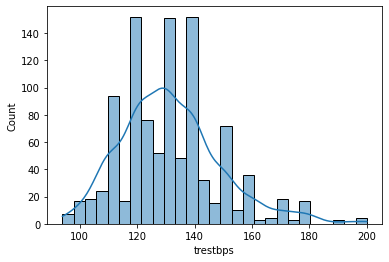

In [ ]:
sns.histplot(df['trestbps'], kde=True)

In [ ]:
mean = df["trestbps"].mean()
mean

131.61170731707318

In [ ]:
std_value= df["trestbps"].std()
std_value

17.516718005376408

In [ ]:
pos_std_3 = mean + (2.5 * std_value)
pos_std_3

175.4035023305142

In [ ]:
neg_std_3 = mean - (2.5 * std_value)
neg_std_3

87.81991230363217

In [ ]:
new_df = df[(df["trestbps"] < pos_std_3) & (df["trestbps"] > neg_std_3)]

In [ ]:
new_df.shape

(1001, 14)

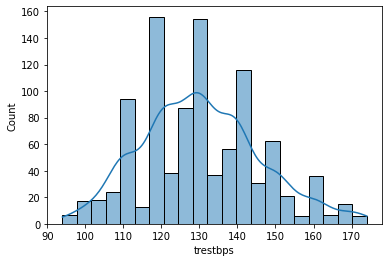

In [ ]:
sns.histplot(new_df['trestbps'], kde=True)

In [ ]:
x = new_df.drop(["target"] , axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y = new_df["target"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1001, dtype: int64

In [ ]:
# fetature selection
from sklearn.feature_selection import SelectKBest , f_classif

In [ ]:
FIT_FEATURES = SelectKBest(score_func=f_classif)

In [ ]:
FIT_FEATURES.fit(x , y)

SelectKBest()

In [ ]:
score_col = pd.DataFrame(FIT_FEATURES.scores_, columns=["score value"])
score_col

,score value
0,54.731390
1,99.364484
2,233.316550
3,12.615546
4,9.243213
5,0.251125
6,21.394618
7,231.283452
8,232.247579
9,249.749007


In [ ]:
col_name = pd.DataFrame(x.columns)
col_name

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [ ]:
top_features = pd.concat([col_name,score_col] , axis=1)
top_features

,0,score value
0,age,54.731390
1,sex,99.364484
2,cp,233.316550
3,trestbps,12.615546
4,chol,9.243213
5,fbs,0.251125
6,restecg,21.394618
7,thalach,231.283452
8,exang,232.247579
9,oldpeak,249.749007


In [ ]:
top_features.nlargest(10,"score value")

,0,score value
9,oldpeak,249.749007
2,cp,233.316550
8,exang,232.247579
7,thalach,231.283452
11,ca,169.367398
10,slope,137.643040
12,thal,125.233609
1,sex,99.364484
0,age,54.731390
6,restecg,21.394618


In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
top_x_features = x.drop(["trestbps","chol","fbs"], axis=1)
top_x_features

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,1,168,0,1.0,2,2,3
1,53,1,0,0,155,1,3.1,0,0,3
2,70,1,0,1,125,1,2.6,0,0,3
3,61,1,0,1,161,0,0.0,2,1,3
4,62,0,0,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,1,164,1,0.0,2,0,2
1021,60,1,0,0,141,1,2.8,1,1,3
1022,47,1,0,0,118,1,1.0,1,1,2
1023,50,0,0,0,159,0,0.0,2,0,2


In [ ]:
# for separate train and test data
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
# svm model
from sklearn.svm import SVC, LinearSVC

In [ ]:
xTrain , xTest , yTrain , yTest = train_test_split(top_x_features , y , test_size=.30, random_state=1)

In [ ]:
liner_model = LinearSVC(C=1.0, max_iter=10000) #C = 1.0 SVM regularization parameter
liner_model.fit(xTrain , yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=10000)

In [ ]:
l_predict = liner_model.predict(xTest)

In [ ]:
print(liner_model.score(xTrain , yTrain))
print(liner_model.score(xTest , yTest))

0.8171428571428572
0.8239202657807309


In [ ]:
#linear model
model = SVC(C=0.1, kernel='linear', gamma= 1)

In [ ]:
model.fit(xTrain , yTrain)

SVC(C=0.1, gamma=1, kernel='linear')

In [ ]:
predict = model.predict(xTest)

In [ ]:
print(model.score(xTrain , yTrain))
print(model.score(xTest , yTest))


0.8485714285714285
0.8471760797342193


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(yTest,predict))

Confusion Matrix:
 [[122  35]
 [ 11 133]]


In [ ]:
print(classification_report(yTest , predict))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       157
           1       0.79      0.92      0.85       144

    accuracy                           0.85       301
   macro avg       0.85      0.85      0.85       301
weighted avg       0.86      0.85      0.85       301



In [ ]:
# rbf kernel
rbf_model = SVC( kernel='rbf', C=1)
rbf_model.fit(xTrain , yTrain)

SVC(C=1)

In [ ]:
rbf_predict = rbf_model.predict(xTest)

In [ ]:
print(rbf_model.score(xTrain , yTrain))
print(rbf_model.score(xTest , yTest))

0.71
0.7142857142857143


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(rbf_predict,yTest))

Confusion Matrix:
 [[ 98  27]
 [ 59 117]]


In [ ]:
# poly kernel
poly_model = SVC(kernel='poly',C=1)
poly_model.fit(xTrain , yTrain)

SVC(C=1, kernel='poly')

In [ ]:
print(poly_model.score(xTrain , yTrain))
print(poly_model.score(xTest , yTest))

0.7128571428571429
0.7209302325581395
